In [1]:
#import dependencies
import pandas as pd
import sklearn as skl
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [ ]:
# train = pd.read_csv('Resources/Cleaned/train.csv')
# test = pd.read_csv('Resources/Cleaned/test.csv')
# concat = pd.concat([train, test])
# concat

In [2]:
import main_preprocessing

concat = main_preprocessing.X_scaled
concat

array([[ 1.61946181,  3.07670468,  0.492293  , ..., -0.21619812,
        -0.77451888,  3.25494177],
       [ 1.87398231,  3.385311  ,  0.60189981, ..., -0.21619812,
         1.29112412, -0.30722516],
       [ 1.39343241,  3.328931  ,  0.55706066, ..., -0.21619812,
        -0.77451888,  3.25494177],
       ...,
       [-1.03780819, -0.80758069, -0.57587517, ..., -0.21619812,
         1.29112412, -0.30722516],
       [-1.04350641, -0.89660175, -0.66854275, ..., -0.21619812,
         1.29112412, -0.30722516],
       [-1.05680226, -0.98859017, -0.66754632, ..., -0.21619812,
         1.29112412, -0.30722516]])

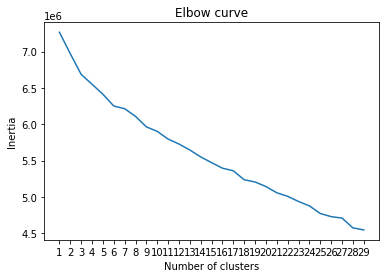

In [3]:
def elbow(concat):
    inertia = []
    k = list(range(1, 30))

    # Calculate the inertia for the range of k values
    for i in k:
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(concat)
        inertia.append(km.inertia_)

    # Create the Elbow Curve and plot it
    elbow_data = {"k": k, "inertia": inertia}
    df_elbow = pd.DataFrame(elbow_data)
    df_elbow.head()
    
    plt.plot(df_elbow['k'], df_elbow['inertia'])
    plt.xticks(range(1,30))
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow curve')
    return plt.show()

elbow_plot = elbow(concat)

In [4]:
# save the elbow plot
joblib.dump(elbow_plot, 'elbow.pkl')

['elbow.pk1']

In [5]:
# there does not appear to be a reasonable optimal
# number of clusters when we provide the data as is

In [6]:
# let's try pca
def pca(concat):
    pca = PCA(n_components=0.99, random_state=0)
    shroom_pca = pca.fit_transform(concat)
    print(pca.explained_variance_ratio_)
    return shroom_pca

shroom_pca = pca(concat)
shroom_pca

[0.0509923  0.0419914  0.0329962  0.02642333 0.02481621 0.02313377
 0.02153987 0.02113531 0.02046055 0.01975719 0.01943024 0.01787839
 0.01741119 0.01648057 0.01602832 0.01592115 0.01554968 0.01499277
 0.01480526 0.01427076 0.01404314 0.01372248 0.01367272 0.01312201
 0.01305752 0.01240619 0.012161   0.01190589 0.01167794 0.0113776
 0.01100728 0.01096641 0.01077739 0.01048142 0.01020826 0.01001443
 0.00984652 0.00976204 0.00968811 0.00936354 0.00917591 0.00901378
 0.00888717 0.00857184 0.00844407 0.00828572 0.00802647 0.00794147
 0.00774715 0.00766308 0.00757114 0.00741816 0.00734946 0.00716381
 0.00707223 0.0068947  0.00676623 0.00664351 0.00654528 0.00652072
 0.00635028 0.00619607 0.00607999 0.0060087  0.00596222 0.00580071
 0.00567915 0.00561158 0.00549772 0.00528157 0.00518708 0.00511
 0.00499435 0.00478925 0.00473471 0.00458739 0.0045181  0.00433844
 0.00420884 0.00414362 0.00406537 0.00392125 0.00380957 0.00373913
 0.00361768 0.00359475 0.00346046 0.00336052 0.0032147  0.00306563

array([[-6.42029977,  4.63212013,  2.17498339, ...,  0.47150834,
        -1.34895486, -0.59489712],
       [-6.59069971,  4.60317128,  2.45103441, ...,  0.38562133,
        -1.31529255, -0.81992001],
       [-6.4605229 ,  4.64198342,  2.16504846, ...,  0.46556683,
        -1.37015249, -0.55681335],
       ...,
       [ 4.73567157,  2.6610459 ,  0.59189792, ...,  0.4946085 ,
         0.07387268,  0.0604034 ],
       [ 4.52730939,  2.80157044,  0.10480261, ...,  0.48057043,
         0.03812838,  0.01158178],
       [ 4.78146244,  2.65044813,  0.52525205, ...,  0.50035824,
         0.08807905,  0.04124892]])

(61069, 2)


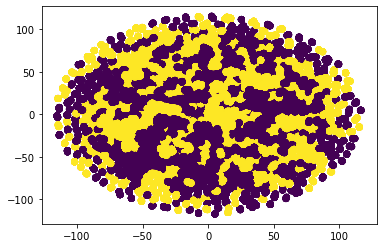

['tsne_mod.pk1']

In [7]:
# and then run tsne on the pca components
def tsne(shroom_pca):
    
    tsne = TSNE(learning_rate=500)
    tsne_features = tsne.fit_transform(shroom_pca)
    
    print(tsne_features.shape)
    
    return tsne_features

def tsne_visual(tsne_features):
    
    labels = main_preprocessing.y
    plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
    tsne_viz = plt.show()
    
    return tsne_viz

tsne_mod = tsne(shroom_pca)
tsne_mod

tsne_plot = tsne_visual(tsne_mod)
tsne_plot

joblib.dump(tsne_plot, 'tsne_mod.pkl')


In [8]:
# put the tsne data into a df
tsne_df = pd.DataFrame(
    data= tsne_mod,
    columns=["component 1", "component 2"],
)

tsne_df.head()

,component 1,component 2
0,-40.748833,45.988575
1,-39.186489,46.068172
2,-40.748749,45.988667
3,19.615486,-82.551598
4,19.044306,-86.604103


In [9]:
# let's try running the kmeans model now that we have composite features

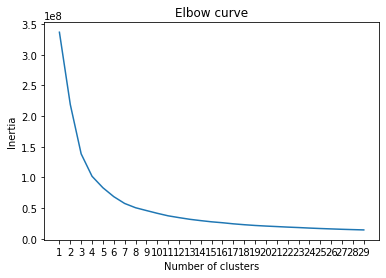

['kmeans_elbow.pk1']

In [33]:
# showing the elbow point to find the optimal number of clusters
kmeans_elbow = elbow(tsne_df)
kmeans_elbow

joblib.dump(kmeans_elbow, 'kmeans_elbow.pkl')

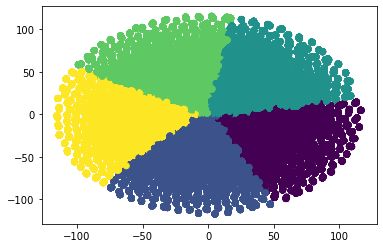

In [13]:
# creating k means clusters

def km_clusters(n, data):

    # Initialize the K-Means model
    model = KMeans(n_clusters=n, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    
    #visualize the clusters
    plt.scatter(data['component 1'], data['component 2'], c=data['class'])
    plot = plt.show()

    return plot

kmeans_model = km_clusters(5, tsne_df)

In [14]:
# save the kmeans model
joblib.dump(kmeans_model, 'kmeans_mod.pkl')

['kmeans_mod.pkl']

In [15]:
# let's take a look at dbscan...

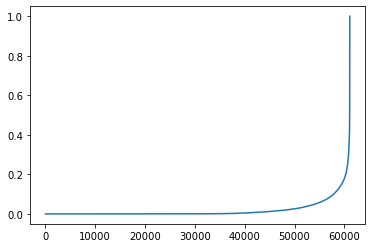

In [16]:
neighbors = NearestNeighbors(n_neighbors=200)
neighbors_fit = neighbors.fit(tsne_df)
distances, indices = neighbors_fit.kneighbors(tsne_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

DBSCAN(eps=0.2, min_samples=35)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}


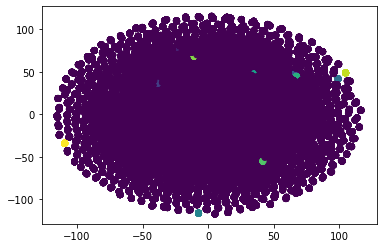

['dbscan_mod.pk1']

In [32]:
# let's also try dbscan
def dbscan_lab(tsne_df):
    dbscan = DBSCAN(eps=0.2, min_samples=35)
    db = dbscan.fit(tsne_df)
    print(db)
    labels = db.labels_
    set(labels)
    return labels
    
def dbscan_viz(tsne_df, dbscan_lab): # visualize dbscan application
    
    labels = dbscan_lab
    plt.scatter(tsne_df['component 1'], tsne_df['component 2'], c=labels)
    
    return plt.show()

fin_labels = dbscan_lab(tsne_df)
print(set(fin_labels))

dbscan_mod = dbscan_viz(tsne_df, fin_labels)

joblib.dump(dbscan_mod, 'dbscan_mod.pkl')


The unsupervised learning approaches applied here aimed to help us understand in what ways (if possible) the mushrooms could be grouped (for potential future recommendation systems -- e.g., if a user input a mushroom into the website and wanted to receive recommendations or insights into similar mushrooms)

Leveraging an elbow curve to find the optimal number of kmean clusters did not quite work as there was never an "elbow" point that could be found with a reasonable range of clusters (<30). 

We then tried reducing the number of features via PCA and TSNE. While creating such composite features helped identify and visualize reasonable numbers of clusters (~5) for kmeans and dbscan clustering, it also meant that we lose the ability to full explain the clusters and their characteristics (i.e., what characteristics/points of similiarity caused xyz mushrooms to be grouped together?)